In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#eksik gözlem var mı yok mu sorgusu
df.isnull().values.any()

np.True_

In [5]:
#degiskenlerdeki eksik deger sayisi
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
# degiskenlerdeki tam deger sayisi
df.notnull().sum()

,0
survived,891
pclass,891
sex,891
age,714
sibsp,891
parch,891
fare,891
embarked,889
class,891
who,891


In [8]:
# veri setindeki toplam eksik deger sayisi
df.isnull().sum().sum()

np.int64(869)

In [9]:
# en az bir tane eksik degere sahip olan gözlem birimleri
df[df.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [10]:
# tam olan gözlem birimleri
df[df.notnull().all(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [12]:
# azalan sekilde siralamak
df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [13]:
# eksik verilerin % lik oranı
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

,0
deck,77.216611
age,19.865320
embarked,0.224467
embark_town,0.224467
sex,0.000000
pclass,0.000000
survived,0.000000
fare,0.000000
parch,0.000000
sibsp,0.000000


In [15]:
#sadece eksik degere sahip degiskenlerin isimleri
na_cols=[col for col in df.columns if df[col].isnull().sum()>0]
na_cols

['age', 'embarked', 'deck', 'embark_town']

# Eksik Değerlerin Fonksiyonlaştırılması

In [18]:
def missing_values_table(dataframe,na_name=False):
  na_columns=[col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
  n_miss=dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio=(dataframe[na_columns].isnull().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
  missing_df=pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=['n_miss','ratio'])
  print(missing_df,end="\n")
  if na_name:
    return na_columns

missing_values_table(df)

             n_miss  ratio
deck            688  77.22
age             177  19.87
embarked          2   0.22
embark_town       2   0.22


# Eksik Değer Problemini Çözme

In [19]:
# hızlıca silmek
df.dropna().shape

(182, 15)

In [21]:
# Atama Yöntemleri ile Doldurmak
df["age"].fillna(df["age"].mean()).isnull().sum()
df["age"].fillna(df["age"].median()).isnull().sum()
df["age"].fillna(0).isnull().sum()

np.int64(0)

In [ ]:
# sayısal verilerin eksik değerlerini ortalama ile doldurur
df_=df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [ ]:
df_.isnull().sum().sort_values(ascending=False)

In [43]:
#kategorik degiskenin eksikleri modu ile doldurulur.
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype=='O' and len(x.unique())<=10) else x,axis=0).isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [44]:
# kategorik degisken kırılımında deger atama
df['age'].fillna(df.groupby("sex")["age"].transform("mean")).isnull().sum()

np.int64(0)

In [45]:
# yas degerinde eksiklik olan kadın degiskeni
df.loc[(df["age"].isnull())&(df["sex"]=="female")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,NaN,Queenstown,yes,True
109,1,3,female,NaN,1,0,24.1500,Q,Third,woman,False,NaN,Queenstown,yes,False
128,1,3,female,NaN,1,1,22.3583,C,Third,woman,False,F,Cherbourg,yes,False
140,0,3,female,NaN,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,no,False
166,1,1,female,NaN,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False


In [67]:
# cinsiyet degiskenine göre yas ortalaması
df.groupby("sex")["age"].mean()

,age
sex,
female,27.915709
male,30.726645


In [68]:
# degiskenin kadınlar icin ortalama degiskeni
df.groupby("sex")["age"].mean()["female"]

np.float64(27.915708812260533)

In [69]:
#kadınların eksik degerleri kadınların ortalaması ile dolduruldu
df.loc[(df["age"].isnull())&(df["sex"]=="female"),"age"]=df.groupby("sex")["age"].mean()["female"]

In [70]:
#erkeklerin eksik degerleri erkeklerin ortalaması ile dolduruldu
df.loc[(df["age"].isnull())&(df["sex"]=="male"),"age"]=df.groupby("sex")["age"].mean()["male"]

In [71]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Tahmine Dayalı  Atama ile Doldurma

In [72]:
def grab_col_names (dataframe, cat_trh=10, car_thr=20):
    cat_cols= [col for  col in dataframe.columns if dataframe[col].dtype =='O']
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique() < cat_trh and dataframe[col].dtype != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_thr and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols= [col for col in  dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [73]:
# ONE HOT ENCODİNG
cat_cols,num_cols,cat_but_car=grab_col_names(df)

dff = pd.get_dummies(df[cat_cols + num_cols],drop_first=True)
dff.head()

,survived,pclass,sibsp,parch,adult_male,alone,age,fare,age_imputed_knn,sex_male,...,embark_town_Southampton,alive_yes,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,0,True,False,22.0,7.2500,22.0,True,...,True,False,False,True,False,False,False,False,False,False
1,1,1,1,0,False,False,38.0,71.2833,38.0,False,...,False,True,False,False,False,True,False,False,False,False
2,1,3,0,0,False,True,26.0,7.9250,26.0,False,...,True,True,False,True,False,False,False,False,False,False
3,1,1,1,0,False,False,35.0,53.1000,35.0,False,...,True,True,False,False,False,True,False,False,False,False
4,0,3,0,0,True,True,35.0,8.0500,35.0,True,...,True,False,False,True,False,False,False,False,False,False


In [74]:
# degiskenlerin standartlastırılması
# ölçekleme işlemi hem makine öğrenmesindeki aradaki uçurum olan sayıları birbirine, uygun matematiksel işlemlerle yaklaştırırken
# hem de verilerin işlenebiliriliğini artırıyor

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
dff=pd.DataFrame(scaler.fit_transform(dff),columns=dff.columns)
dff.head()

,survived,pclass,sibsp,parch,adult_male,alone,age,fare,age_imputed_knn,sex_male,...,embark_town_Southampton,alive_yes,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,1.0,0.125,0.0,1.0,0.0,0.271174,0.014151,0.271174,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.125,0.0,0.0,0.0,0.472229,0.139136,0.472229,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.0,1.0,0.321438,0.015469,0.321438,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.125,0.0,0.0,0.0,0.434531,0.103644,0.434531,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.000,0.0,1.0,1.0,0.434531,0.015713,0.434531,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# knn' in uygulanması
# makine ögrenmesi modeli ile tahmine dayalı sekilde eksik degerleri doldurabilir
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
dff=pd.DataFrame(imputer.fit_transform(dff),columns=dff.columns)
dff.head()

,survived,pclass,sibsp,parch,adult_male,alone,age,fare,age_imputed_knn,sex_male,...,embark_town_Southampton,alive_yes,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,1.0,0.125,0.0,1.0,0.0,0.271174,0.014151,0.271174,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.125,0.0,0.0,0.0,0.472229,0.139136,0.472229,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.0,1.0,0.321438,0.015469,0.321438,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.125,0.0,0.0,0.0,0.434531,0.103644,0.434531,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.000,0.0,1.0,1.0,0.434531,0.015713,0.434531,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# gercek degerlerine geri cagırma
dff=pd.DataFrame(scaler.inverse_transform(dff),columns=dff.columns)

In [77]:
df["age_imputed_knn"]=dff[["age"]]

# eksik olan degerlerin yerine atanmış degerlerle gormek icin
df.loc[df["age"].isnull(),["age","age_imputed_knn"]]

,age,age_imputed_knn


# Eksik Veri Yapısının İncelenmesi

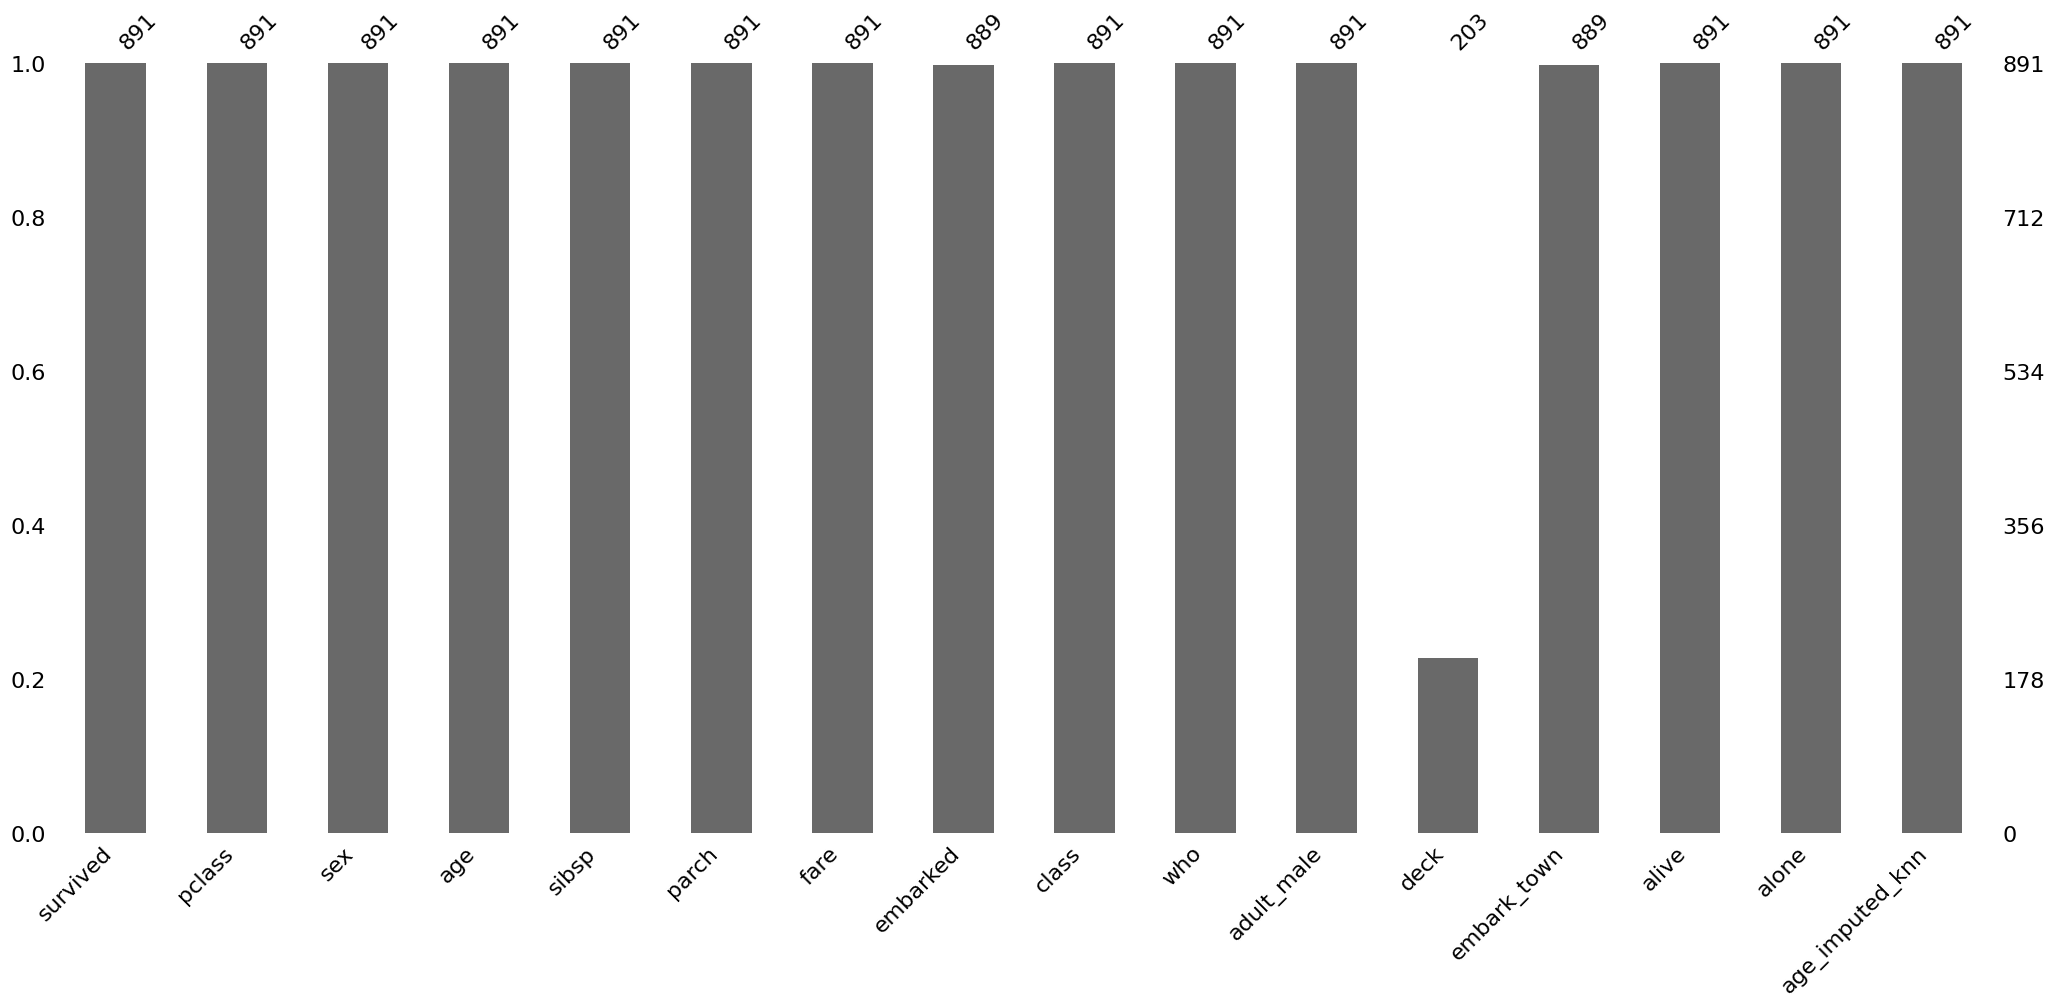

In [79]:
# !pip install missingno
import missingno as msno

msno.bar(df)
plt.show()

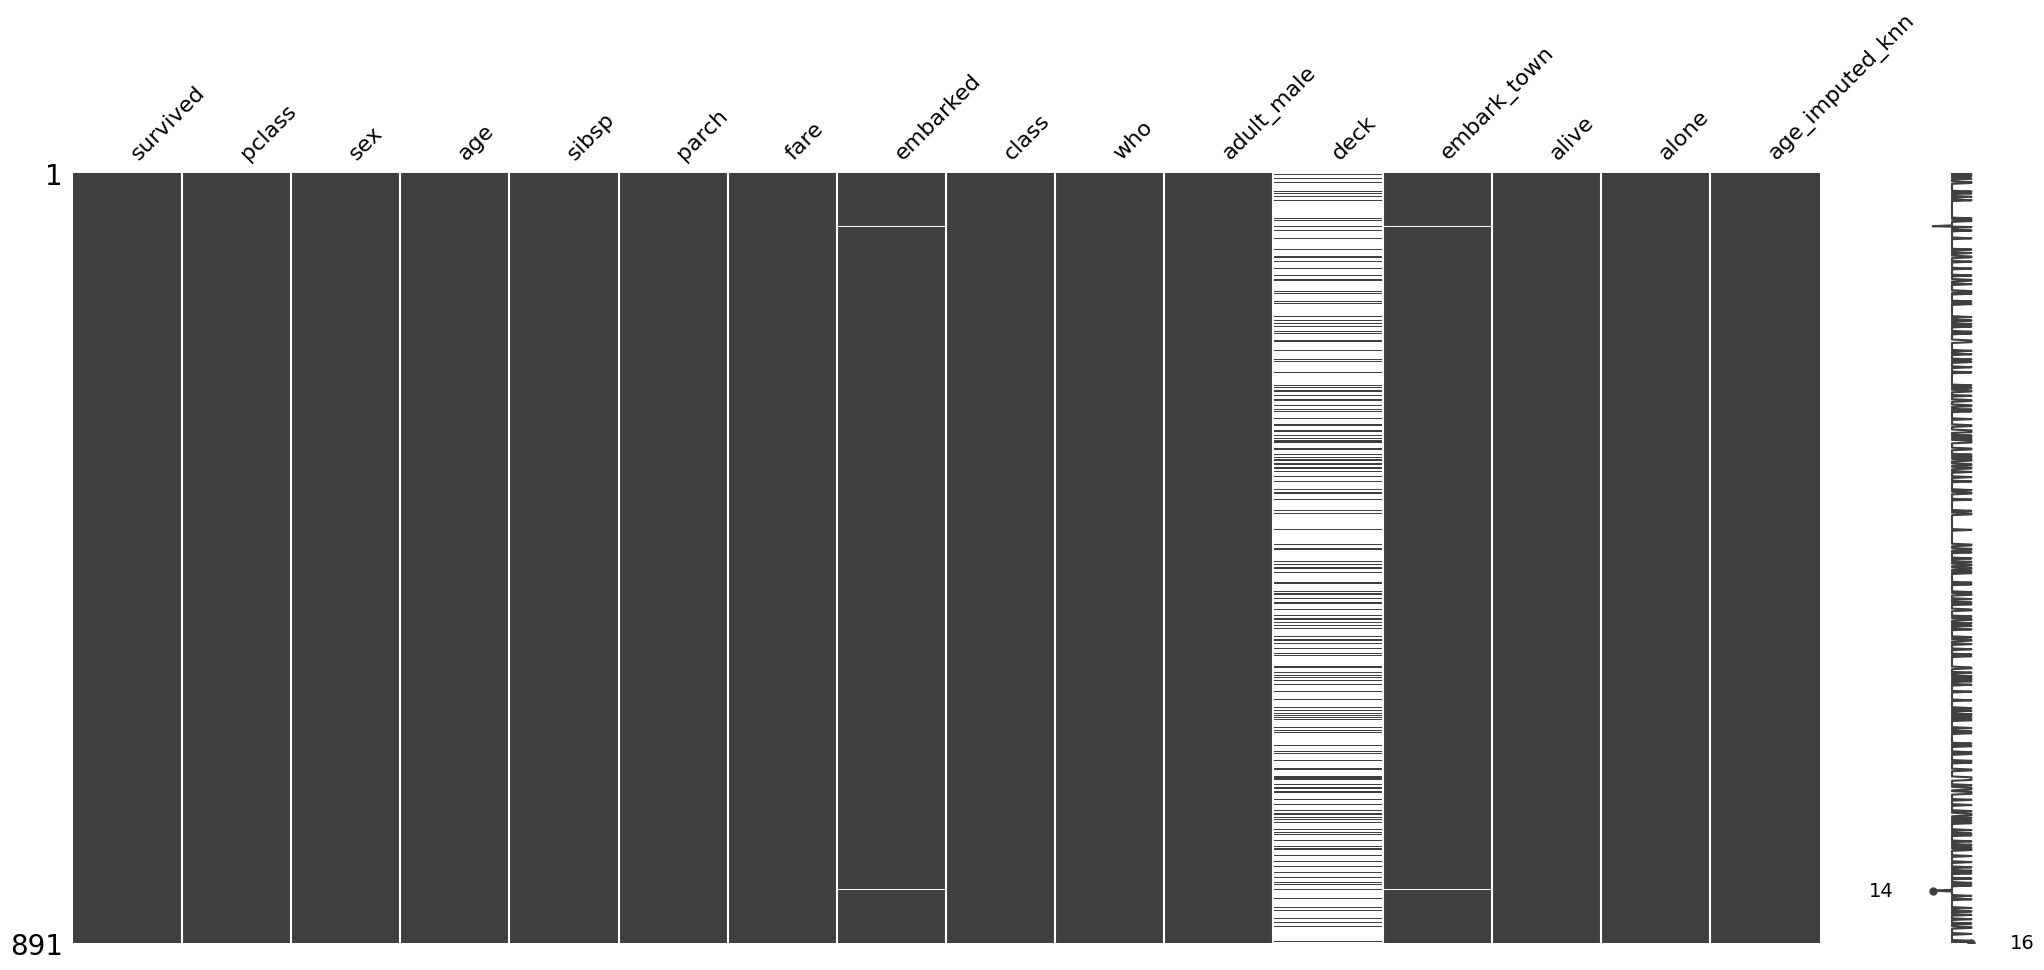

In [82]:
# benzer degisikliklerin eksik degerlerin birlikte olup olmadığına bakılır.
msno.matrix(df)
plt.show()

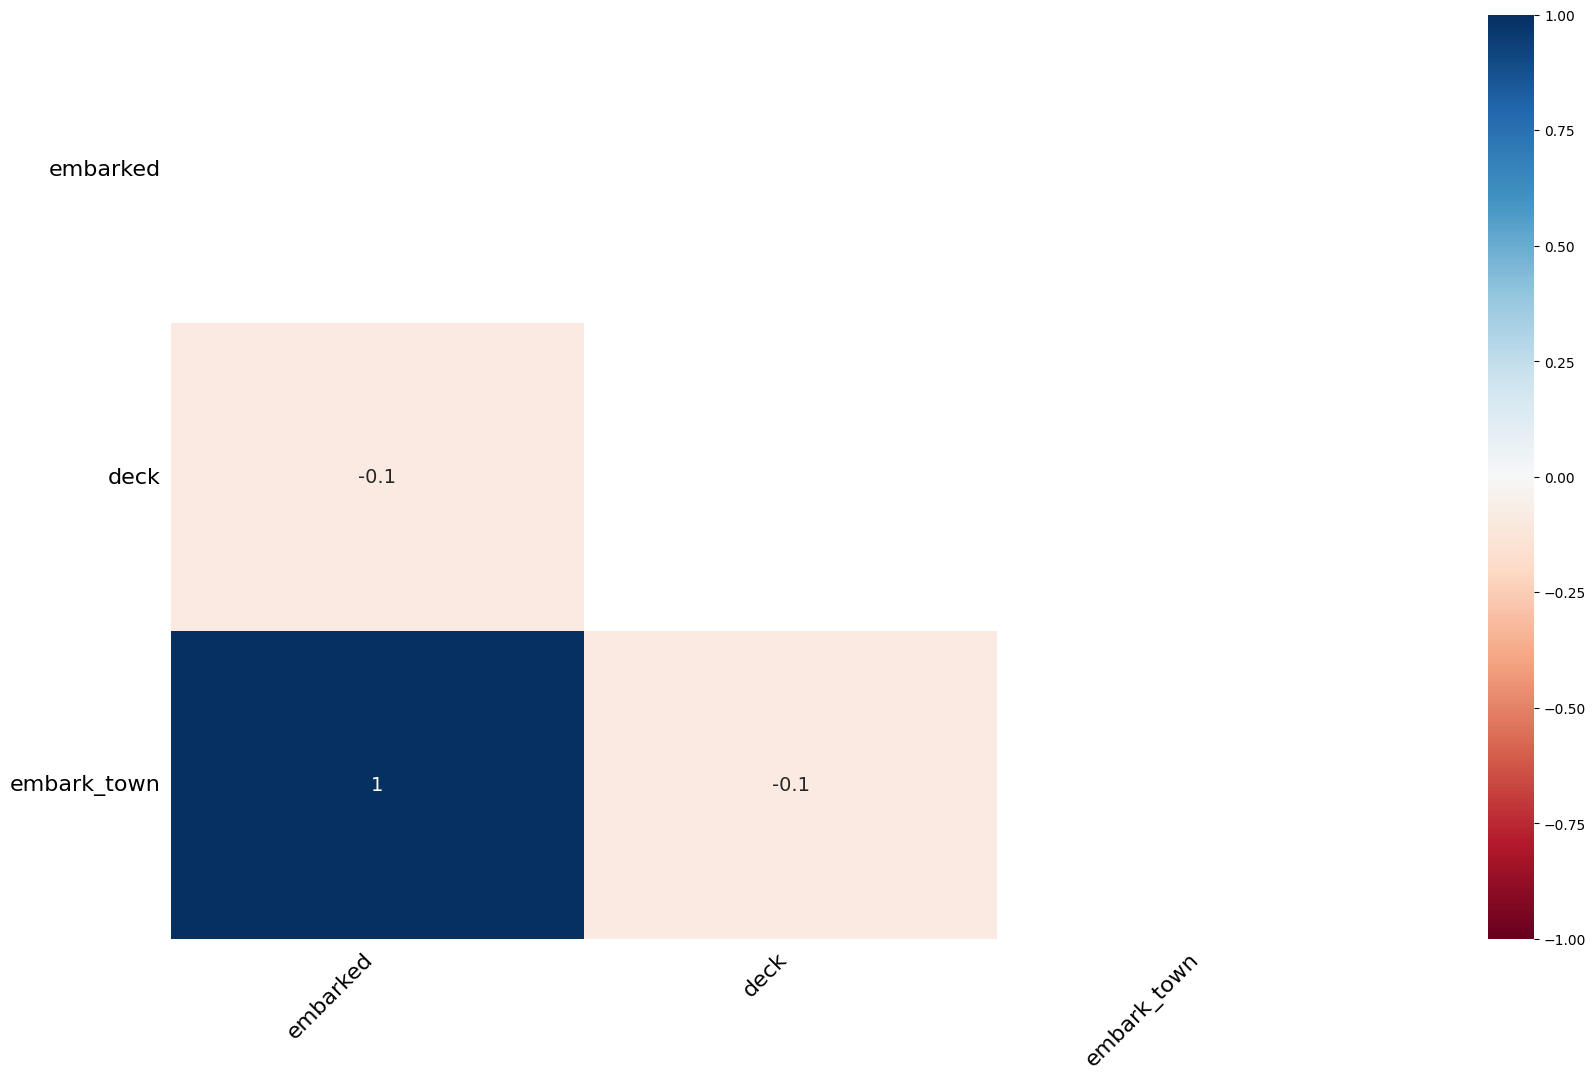

In [83]:
#eksik degerlerin rassallığına bakılır
msno.heatmap(df)
plt.show()

# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi

In [84]:
missing_values_table(df,True)

             n_miss  ratio
deck            688  77.22
embarked          2   0.22
embark_town       2   0.22


['embarked', 'deck', 'embark_town']